<a href="https://colab.research.google.com/github/elghallali/NLP_Project/blob/master/Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">

![Logo](https://raw.githubusercontent.com/elghallali/my-images/master/Faculty%20Official/logo.png)
    
    
</div>
<div align="right">$\underline{7^{th} July \ 2023}$</div>

---

<div align="center">

# Recommendation system using machine learning-based sentiment analysis

</div>

---

In [ ]:
#!pip install nltk

## Used libraries importation

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

import nltk
nltk.download('stopwords') ##- for jupyter notebook
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_absolute_error,mean_squared_error,roc_auc_score,f1_score

nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 1. Import Data:

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
db = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analyse de sentiments/all_kindle_review.csv')
db

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


## 2. Data preprocessing:

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


In [ ]:
db_needed = db[['reviewText','rating', 'asin', 'reviewerID']]
db_needed.head()

,reviewText,rating,asin,reviewerID
0,"Jace Rankin may be short, but he's nothing to ...",3,B0033UV8HI,A3HHXRELK8BHQG
1,Great short read. I didn't want to put it dow...,5,B002HJV4DE,A2RGNZ0TRF578I
2,I'll start by saying this is the first of four...,3,B002ZG96I4,A3S0H2HV6U1I7F
3,Aggie is Angela Lansbury who carries pocketboo...,3,B002QHWOEU,AC4OQW3GZ919J
4,I did not expect this type of book to be in li...,4,B001A06VJ8,A3C9V987IQHOQD


In [ ]:
db_needed.groupby('reviewerID').describe()

rating                                          
                       count mean       std  min   25%  50%   75%  max
reviewerID                                                            
A0089401235VSN3Z6F3HK    1.0  5.0       NaN  5.0  5.00  5.0  5.00  5.0
A0099735VDZ3HDCAAYKL     4.0  4.5  0.577350  4.0  4.00  4.5  5.00  5.0
A025153932FWH3GPV46I1    2.0  2.5  0.707107  2.0  2.25  2.5  2.75  3.0
A026598010DVEJLSZ7H2U    2.0  4.0  1.414214  3.0  3.50  4.0  4.50  5.0
A027216626S6GHZAIP80D    2.0  3.0  0.000000  3.0  3.00  3.0  3.00  3.0
...                      ...  ...       ...  ...   ...  ...   ...  ...
AZWOQXRCS1WA6            1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0
AZY0ZLZHJYTSE            1.0  2.0       NaN  2.0  2.00  2.0  2.00  2.0
AZZ26WCXRPFJX            1.0  1.0       NaN  1.0  1.00  1.0  1.00  1.0
AZZINZCFEEUVC            1.0  5.0       NaN  5.0  5.00  5.0  5.00  5.0
AZZPTYC0F6FWA            2.0  1.0  0.000000  1.0  1.00  1.0  1.00  1.0

[7614 rows x 8 columns]

In [ ]:
db_needed.groupby('asin').describe()

rating                                               
            count      mean       std  min   25%  50%   75%  max
asin                                                            
B000F83SZQ    8.0  4.250000  0.462910  4.0  4.00  4.0  4.25  5.0
B000FA64PA    5.0  4.200000  0.836660  3.0  4.00  4.0  5.00  5.0
B000FA64PK    8.0  4.375000  0.916125  3.0  3.75  5.0  5.00  5.0
B000FA64QO    5.0  3.800000  1.303840  2.0  3.00  4.0  5.00  5.0
B000FBFMVG    9.0  4.333333  0.866025  3.0  4.00  5.0  5.00  5.0
...           ...       ...       ...  ...   ...  ...   ...  ...
B004NSV5DG    2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
B004NSV8JC    1.0  1.000000       NaN  1.0  1.00  1.0  1.00  1.0
B004NSVQ6M    2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
B004O0U7QY    2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0
B004O0UA1Q    2.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0

[2114 rows x 8 columns]

In [ ]:
db_needed.groupby('rating').describe()

reviewText                                                            \
            count unique                                                top   
rating                                                                        
1            2000   2000  I received a copy of book to review. "A secret...   
2            2000   2000  This has the makings of a good story... unfort...   
3            2000   2000  Jace Rankin may be short, but he's nothing to ...   
4            3000   3000  I did not expect this type of book to be in li...   
5            3000   3000  Great short read.  I didn't want to put it dow...   

             asin                         reviewerID                         \
       freq count unique         top freq      count unique             top   
rating                                                                        
1         1  2000   1094  B003FL6X52   27       2000   1671  A3A7FF87LEVCQ1   
2         1  2000   1033  B0038KX8S0   30       2000   1646  A3A7FF87LEVCQ1   
3         1  2000    788  B0038KX8S0   44       2000   1619  A1ZN2JLLR9GI3T   
4         1  3000    745  B002D48NBO   35       3000   2271  A1OGPR0AKZ4K7D   
5         1  3000    516  B001HQHCBQ   63       3000   2286   A320TMDV6KCFU   

             
       freq  
rating       
1        29  
2        45  
3        10  
4        21  
5        96

In [ ]:
#removing rows with no reviews
db_needed = db_needed[db_needed['reviewText'].notna()]
db_needed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  12000 non-null  object
 1   rating      12000 non-null  int64 
 2   asin        12000 non-null  object
 3   reviewerID  12000 non-null  object
dtypes: int64(1), object(3)
memory usage: 468.8+ KB


In [ ]:
#tokenization
db_needed['reviewText_t'] = db_needed['reviewText'].apply(word_tokenize)
db_needed.head()

,reviewText,rating,asin,reviewerID,reviewText_t
0,"Jace Rankin may be short, but he's nothing to ...",3,B0033UV8HI,A3HHXRELK8BHQG,"[Jace, Rankin, may, be, short, ,, but, he, 's,..."
1,Great short read. I didn't want to put it dow...,5,B002HJV4DE,A2RGNZ0TRF578I,"[Great, short, read, ., I, did, n't, want, to,..."
2,I'll start by saying this is the first of four...,3,B002ZG96I4,A3S0H2HV6U1I7F,"[I, 'll, start, by, saying, this, is, the, fir..."
3,Aggie is Angela Lansbury who carries pocketboo...,3,B002QHWOEU,AC4OQW3GZ919J,"[Aggie, is, Angela, Lansbury, who, carries, po..."
4,I did not expect this type of book to be in li...,4,B001A06VJ8,A3C9V987IQHOQD,"[I, did, not, expect, this, type, of, book, to..."


In [ ]:
# removing punctuation marks
import string
#nltk.download('punkt') - to add for jupyer notebook
db_needed['reviewText_wo_punctuation'] = db_needed['reviewText_t'].apply(lambda x: [char for char in x if char not in string.punctuation])
db_needed.head()

,reviewText,rating,asin,reviewerID,reviewText_t,reviewText_wo_punctuation
0,"Jace Rankin may be short, but he's nothing to ...",3,B0033UV8HI,A3HHXRELK8BHQG,"[Jace, Rankin, may, be, short, ,, but, he, 's,...","[Jace, Rankin, may, be, short, but, he, 's, no..."
1,Great short read. I didn't want to put it dow...,5,B002HJV4DE,A2RGNZ0TRF578I,"[Great, short, read, ., I, did, n't, want, to,...","[Great, short, read, I, did, n't, want, to, pu..."
2,I'll start by saying this is the first of four...,3,B002ZG96I4,A3S0H2HV6U1I7F,"[I, 'll, start, by, saying, this, is, the, fir...","[I, 'll, start, by, saying, this, is, the, fir..."
3,Aggie is Angela Lansbury who carries pocketboo...,3,B002QHWOEU,AC4OQW3GZ919J,"[Aggie, is, Angela, Lansbury, who, carries, po...","[Aggie, is, Angela, Lansbury, who, carries, po..."
4,I did not expect this type of book to be in li...,4,B001A06VJ8,A3C9V987IQHOQD,"[I, did, not, expect, this, type, of, book, to...","[I, did, not, expect, this, type, of, book, to..."


In [ ]:
#removing stop words
db_needed['reviewText_filtered'] = db_needed['reviewText_wo_punctuation'].apply(lambda x: [word for word in x if not word in stop_words])
db_needed.head()

,reviewText,rating,asin,reviewerID,reviewText_t,reviewText_wo_punctuation,reviewText_filtered
0,"Jace Rankin may be short, but he's nothing to ...",3,B0033UV8HI,A3HHXRELK8BHQG,"[Jace, Rankin, may, be, short, ,, but, he, 's,...","[Jace, Rankin, may, be, short, but, he, 's, no...","[Jace, Rankin, may, short, 's, nothing, mess, ..."
1,Great short read. I didn't want to put it dow...,5,B002HJV4DE,A2RGNZ0TRF578I,"[Great, short, read, ., I, did, n't, want, to,...","[Great, short, read, I, did, n't, want, to, pu...","[Great, short, read, I, n't, want, put, I, rea..."
2,I'll start by saying this is the first of four...,3,B002ZG96I4,A3S0H2HV6U1I7F,"[I, 'll, start, by, saying, this, is, the, fir...","[I, 'll, start, by, saying, this, is, the, fir...","[I, 'll, start, saying, first, four, books, I,..."
3,Aggie is Angela Lansbury who carries pocketboo...,3,B002QHWOEU,AC4OQW3GZ919J,"[Aggie, is, Angela, Lansbury, who, carries, po...","[Aggie, is, Angela, Lansbury, who, carries, po...","[Aggie, Angela, Lansbury, carries, pocketbooks..."
4,I did not expect this type of book to be in li...,4,B001A06VJ8,A3C9V987IQHOQD,"[I, did, not, expect, this, type, of, book, to...","[I, did, not, expect, this, type, of, book, to...","[I, expect, type, book, library, pleased, find..."


In [ ]:
ps = PorterStemmer()
db_needed['reviewText_s'] = db_needed['reviewText_filtered'].apply(lambda x: ' '.join([ps.stem(i) for i in x]))
db_needed.head()

,reviewText,rating,asin,reviewerID,reviewText_t,reviewText_wo_punctuation,reviewText_filtered,reviewText_s
0,"Jace Rankin may be short, but he's nothing to ...",3,B0033UV8HI,A3HHXRELK8BHQG,"[Jace, Rankin, may, be, short, ,, but, he, 's,...","[Jace, Rankin, may, be, short, but, he, 's, no...","[Jace, Rankin, may, short, 's, nothing, mess, ...",jace rankin may short 's noth mess man haul sa...
1,Great short read. I didn't want to put it dow...,5,B002HJV4DE,A2RGNZ0TRF578I,"[Great, short, read, ., I, did, n't, want, to,...","[Great, short, read, I, did, n't, want, to, pu...","[Great, short, read, I, n't, want, put, I, rea...",great short read i n't want put i read one sit...
2,I'll start by saying this is the first of four...,3,B002ZG96I4,A3S0H2HV6U1I7F,"[I, 'll, start, by, saying, this, is, the, fir...","[I, 'll, start, by, saying, this, is, the, fir...","[I, 'll, start, saying, first, four, books, I,...",i 'll start say first four book i n't expect 3...
3,Aggie is Angela Lansbury who carries pocketboo...,3,B002QHWOEU,AC4OQW3GZ919J,"[Aggie, is, Angela, Lansbury, who, carries, po...","[Aggie, is, Angela, Lansbury, who, carries, po...","[Aggie, Angela, Lansbury, carries, pocketbooks...",aggi angela lansburi carri pocketbook instead ...
4,I did not expect this type of book to be in li...,4,B001A06VJ8,A3C9V987IQHOQD,"[I, did, not, expect, this, type, of, book, to...","[I, did, not, expect, this, type, of, book, to...","[I, expect, type, book, library, pleased, find...",i expect type book librari pleas find price right


In [ ]:
lemma = WordNetLemmatizer()
db_needed['reviewText_l'] = db_needed['reviewText_s'].apply(lambda x: ' '.join([lemma.lemmatize(i) for i in x]))
db_needed.head()

,reviewText,rating,asin,reviewerID,reviewText_t,reviewText_wo_punctuation,reviewText_filtered,reviewText_s,reviewText_l
0,"Jace Rankin may be short, but he's nothing to ...",3,B0033UV8HI,A3HHXRELK8BHQG,"[Jace, Rankin, may, be, short, ,, but, he, 's,...","[Jace, Rankin, may, be, short, but, he, 's, no...","[Jace, Rankin, may, short, 's, nothing, mess, ...",jace rankin may short 's noth mess man haul sa...,j a c e r a n k i n m a y s h o r t ' ...
1,Great short read. I didn't want to put it dow...,5,B002HJV4DE,A2RGNZ0TRF578I,"[Great, short, read, ., I, did, n't, want, to,...","[Great, short, read, I, did, n't, want, to, pu...","[Great, short, read, I, n't, want, put, I, rea...",great short read i n't want put i read one sit...,g r e a t s h o r t r e a d i n ' t ...
2,I'll start by saying this is the first of four...,3,B002ZG96I4,A3S0H2HV6U1I7F,"[I, 'll, start, by, saying, this, is, the, fir...","[I, 'll, start, by, saying, this, is, the, fir...","[I, 'll, start, saying, first, four, books, I,...",i 'll start say first four book i n't expect 3...,i ' l l s t a r t s a y f i r s t f ...
3,Aggie is Angela Lansbury who carries pocketboo...,3,B002QHWOEU,AC4OQW3GZ919J,"[Aggie, is, Angela, Lansbury, who, carries, po...","[Aggie, is, Angela, Lansbury, who, carries, po...","[Aggie, Angela, Lansbury, carries, pocketbooks...",aggi angela lansburi carri pocketbook instead ...,a g g i a n g e l a l a n s b u r i c a ...
4,I did not expect this type of book to be in li...,4,B001A06VJ8,A3C9V987IQHOQD,"[I, did, not, expect, this, type, of, book, to...","[I, did, not, expect, this, type, of, book, to...","[I, expect, type, book, library, pleased, find...",i expect type book librari pleas find price right,i e x p e c t t y p e b o o k l i b r ...


## 3. Feature extraction:

In [ ]:
X = db_needed['reviewText_s']
db_needed['SA'] = [0 if i < 3 else 1 for i in db_needed['rating']]
y = db_needed['SA']


## 4. Sentiment model training:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8400,)
(3600,)
(8400,)
(3600,)


In [ ]:
X_train.head()

1175    man i wish seri longer i thought book realli g...
2715    ok main charact book meant super geni right we...
8049    the order four son o4 modern organ call attack...
5145    ok .... like fifti shade grey might like book ...
4742    despit pronounc limp professor brioni swift ex...
Name: reviewText_s, dtype: object

In [ ]:
vector = CountVectorizer()

#it 'learns' the vocabulary and builds a matrix:
vector.fit(X_train)
X_train_matrix = vector.transform(X_train)

In [ ]:
#apply same on test database
X_test_matrix = vector.transform(X_test)
X_test_matrix

<3600x19229 sparse matrix of type '<class 'numpy.int64'>'
	with 164179 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_matrix)
tfidf_transformer.transform(X_train_matrix)

<8400x19229 sparse matrix of type '<class 'numpy.float64'>'
	with 392757 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NBayes = MultinomialNB()
NBayes.fit(X_train_matrix, y_train)

y_predicted_NB = NBayes.predict(X_test_matrix)


accuracy_NB = accuracy_score(y_test, y_predicted_NB)

confusion_mat_NB = confusion_matrix(y_test, y_predicted_NB)

print(f'Y predicted: {y_predicted_NB}')
print(f'Accuracy: {accuracy_NB}')
print(f'confusion matrix: {confusion_mat_NB}')

Y predicted: [1 0 1 ... 1 1 0]
Accuracy: 0.8302777777777778
confusion matrix: [[ 886  288]
 [ 323 2103]]


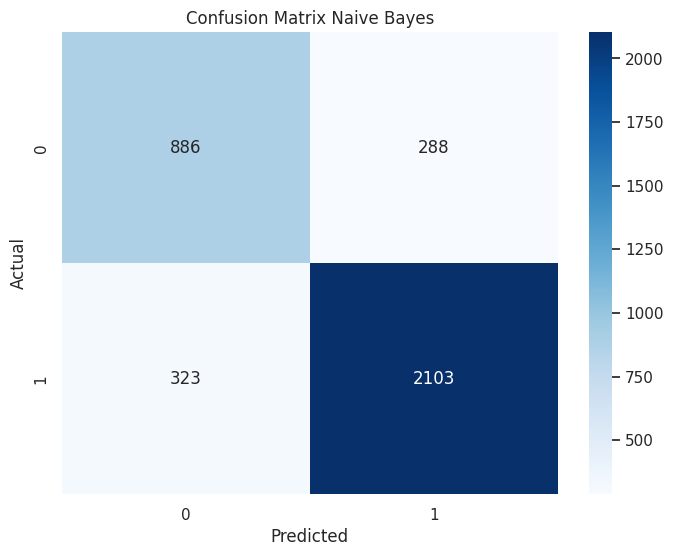

In [ ]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat_NB, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
auc_NB = roc_auc_score(y_test, y_predicted_NB)
f1_score_NB = f1_score(y_test, y_predicted_NB, average='micro')

print(f'AUC: {auc_NB}')
print(f'F1 Score NB: {f1_score_NB}')

AUC: 0.8107719326827063
F1 Score NB: 0.8302777777777778


In [ ]:
rmse_NB = np.sqrt(mean_squared_error(y_test, y_predicted_NB))
rmse_NB

0.41197356981027583

In [ ]:
mae_NB = mean_absolute_error(y_test, y_predicted_NB)
mae_NB

0.16972222222222222

In [ ]:
# ... existing code ...

from sklearn.svm import SVC

# ...

svm = SVC()
svm.fit(X_train_matrix, y_train)

y_predicted_svm = svm.predict(X_test_matrix)

accuracy = accuracy_score(y_test, y_predicted_svm)
confusion_mat = confusion_matrix(y_test, y_predicted_svm)

print(f'Y predicted: {y_predicted_svm}')
print(f'Accuracy: {accuracy}')
print(f'confusion matrix: {confusion_mat}')

Y predicted: [1 1 1 ... 1 1 0]
Accuracy: 0.8258333333333333
confusion matrix: [[ 719  455]
 [ 172 2254]]


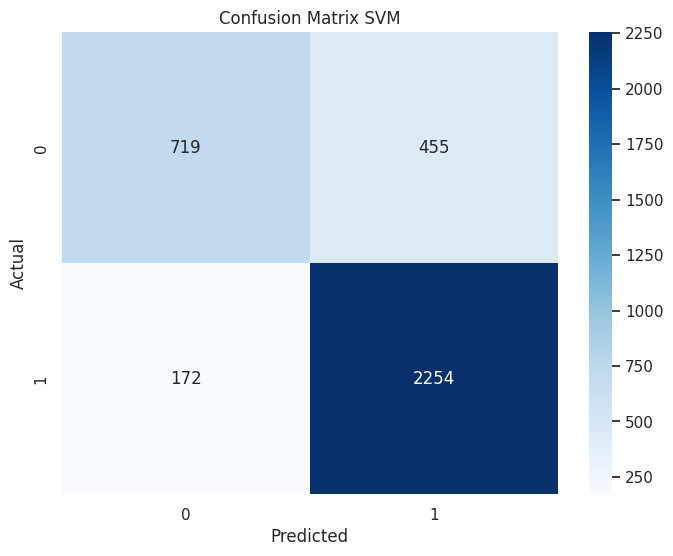

In [ ]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

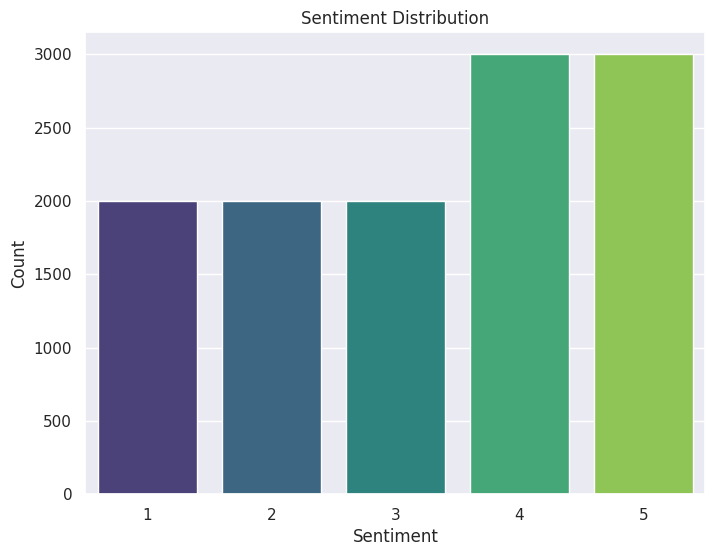

In [ ]:
sentiment_counts = db_needed['rating'].value_counts()

plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=db_needed, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
auc_svm = roc_auc_score(y_test, y_predicted_svm)
auc_svm

0.7707687586635975

In [ ]:
f1_score_svm = f1_score(y_test, y_predicted_svm, average='micro')
f1_score_svm

0.8258333333333333

In [ ]:
data_ = {'Performance':['Accuracy','Accuracy', 'F1 Score' , 'F1 Score', 'AUC', 'AUC'], 'Values':[accuracy,accuracy_NB, f1_score_svm, f1_score_NB, auc_svm, auc_NB], 'Model': ['SVM', 'NB', 'SVM', 'NB','SVM', 'NB']}
data_performance = pd.DataFrame(data_)
data_performance

,Performance,Values,Model
0,Accuracy,0.825833,SVM
1,Accuracy,0.830278,NB
2,F1 Score,0.825833,SVM
3,F1 Score,0.830278,NB
4,AUC,0.770769,SVM
5,AUC,0.810772,NB


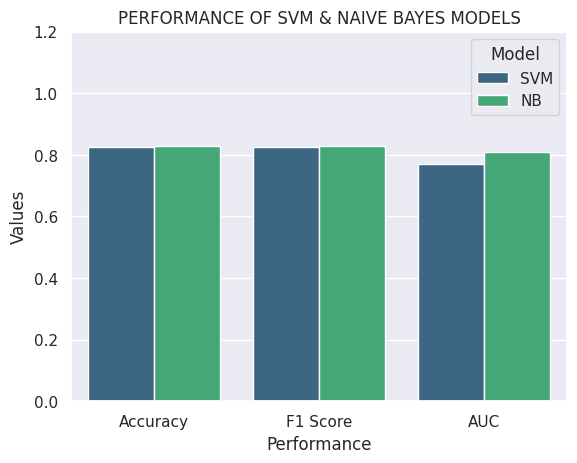

In [ ]:
# Generate some sequential data
sns.barplot(x=data_performance['Performance'], y=data_performance['Values'], palette='viridis', hue=data_performance['Model'])
# Add value annotations to the bars

plt.ylim(0, 1.2)
plt.title('PERFORMANCE OF SVM & NAIVE BAYES MODELS')
plt.show()

In [ ]:
rmse_svm = np.sqrt(mean_squared_error(y_test, y_predicted_svm))
rmse_svm

0.4173328008516305

In [ ]:
mae_svm = mean_absolute_error(y_test, y_predicted_svm)
mae_svm

0.17416666666666666

In [ ]:
# Assuming you have a DataFrame called db_needed with 'reviewText' and 'rating' columns

X_WithoutSA = db_needed['reviewText']
y_WithoutSA = db_needed['SA']

# Split the data into training and test sets
X_WithoutSA_train, X_WithoutSA_test, y_WithoutSA_train, y_WithoutSA_test = train_test_split(
    X_WithoutSA, y_WithoutSA, test_size=0.3, random_state=10
)

# Vectorize the data using CountVectorizer
vector_WithoutSA = CountVectorizer()
vector_WithoutSA.fit(X_WithoutSA_train)
X_WithoutSA_train_matrix = vector_WithoutSA.transform(X_WithoutSA_train)
X_WithoutSA_test_matrix = vector_WithoutSA.transform(X_WithoutSA_test)

# Apply TF-IDF transformation
tfidf_transformer_WithoutSA = TfidfTransformer()
tfidf_transformer_WithoutSA.fit(X_WithoutSA_train_matrix)
X_WithoutSA_train_matrix = tfidf_transformer_WithoutSA.transform(X_WithoutSA_train_matrix)
X_WithoutSA_test_matrix = tfidf_transformer_WithoutSA.transform(X_WithoutSA_test_matrix)

# Train an SVM model
svm_WithoutSA = SVC()
svm_WithoutSA.fit(X_WithoutSA_train_matrix, y_WithoutSA_train)

# Make predictions on the test set
y_WithoutSA_predicted_svm = svm_WithoutSA.predict(X_WithoutSA_test_matrix)

# Calculate accuracy for SVM model without Sentiment Analysis
accuracy_WithoutSA_svm = accuracy_score(y_WithoutSA_test, y_WithoutSA_predicted_svm)

# Calculate confusion matrix for SVM model without Sentiment Analysis
confusion_mat_WithoutSA_svm = confusion_matrix(y_WithoutSA_test, y_WithoutSA_predicted_svm)


# Calculate AUC for SVM model without Sentiment Analysis
auc_WithoutSA_svm = roc_auc_score(y_WithoutSA_test, y_WithoutSA_predicted_svm)

# Print the results
print(f'Y predicted: {y_WithoutSA_predicted_svm}')
print(f'Accuracy: {accuracy_WithoutSA_svm}')
print(f'AUC: {auc_WithoutSA_svm}')
print(f'Confusion matrix: {confusion_mat_WithoutSA_svm}')

Y predicted: [1 1 1 ... 1 0 0]
Accuracy: 0.8583333333333333
AUC: 0.8205984009123198
Confusion matrix: [[ 836  338]
 [ 172 2254]]


In [ ]:
rmse_WithoutSA_svm = np.sqrt(mean_squared_error(y_WithoutSA_test, y_WithoutSA_predicted_svm))
rmse_WithoutSA_svm

0.3763863263545405

In [ ]:
mae_WithoutSA_svm = mean_absolute_error(y_WithoutSA_test, y_WithoutSA_predicted_svm)
mae_WithoutSA_svm

0.14166666666666666

In [ ]:
data_ = {'SA':['With SA','With SA', 'Without SA' , 'Without SA'], 'Values':[rmse_svm, mae_svm, rmse_WithoutSA_svm, mae_WithoutSA_svm], 'type': ['RMSE', 'MAE', 'RMSE', 'MAE']}
data_err = pd.DataFrame(data_)
data_err

,SA,Values,type
0,With SA,0.417333,RMSE
1,With SA,0.174167,MAE
2,Without SA,0.376386,RMSE
3,Without SA,0.141667,MAE


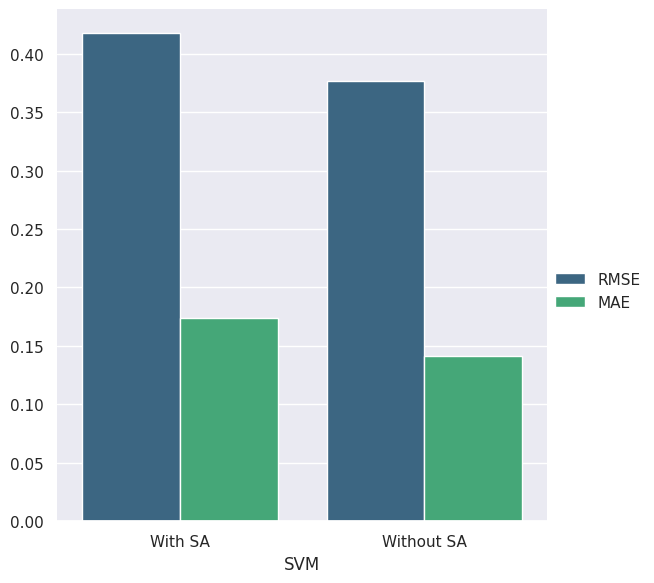

In [ ]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data_err, kind="bar",
    x="SA", y="Values", hue="type",
    errorbar="sd", palette="viridis", height=6
)
g.despine(left=True)
g.set_axis_labels("SVM", "")
g.legend.set_title("")

In [ ]:
# Assuming you have a DataFrame called db_needed with 'reviewText' and 'rating' columns

X_WithoutSA_NB = db_needed['reviewText']
y_WithoutSA_NB = db_needed['SA']

# Split the data into training and test sets
X_WithoutSA_train_NB, X_WithoutSA_test_NB, y_WithoutSA_train_NB, y_WithoutSA_test_NB = train_test_split(
    X_WithoutSA_NB, y_WithoutSA_NB, test_size=0.3, random_state=10
)

# Vectorize the data using CountVectorizer
vector_WithoutSA_NB = CountVectorizer()
vector_WithoutSA_NB.fit(X_WithoutSA_train)
X_WithoutSA_NB_train_matrix = vector_WithoutSA_NB.transform(X_WithoutSA_train_NB)
X_WithoutSA_NB_test_matrix = vector_WithoutSA_NB.transform(X_WithoutSA_test_NB)

# Apply TF-IDF transformation
tfidf_transformer_WithoutSA_NB = TfidfTransformer()
tfidf_transformer_WithoutSA_NB.fit(X_WithoutSA_train_matrix)
X_WithoutSA_NB_train_matrix = tfidf_transformer_WithoutSA.transform(X_WithoutSA_NB_train_matrix)
X_WithoutSA_NB_test_matrix = tfidf_transformer_WithoutSA.transform(X_WithoutSA_NB_test_matrix)

# Train an NB model
NB_WithoutSA = MultinomialNB()
NB_WithoutSA.fit(X_WithoutSA_NB_train_matrix, y_WithoutSA_train_NB)

# Make predictions on the test set
y_WithoutSA_predicted_NB = NB_WithoutSA.predict(X_WithoutSA_NB_test_matrix)

# Calculate accuracy for NB model without Sentiment Analysis
accuracy_WithoutSA_NB = accuracy_score(y_WithoutSA_test_NB, y_WithoutSA_predicted_NB)

# Calculate confusion matrix for NB model without Sentiment Analysis
confusion_mat_WithoutSA_NB = confusion_matrix(y_WithoutSA_test_NB, y_WithoutSA_predicted_NB)


# Calculate AUC for NB model without Sentiment Analysis
auc_WithoutSA_NB = roc_auc_score(y_WithoutSA_test_NB, y_WithoutSA_predicted_NB)

# Print the results
print(f'Y predicted: {y_WithoutSA_predicted_NB}')
print(f'Accuracy: {accuracy_WithoutSA_NB}')
print(f'AUC: {auc_WithoutSA_NB}')
print(f'Confusion matrix: {confusion_mat_WithoutSA_NB}')


Y predicted: [1 1 1 ... 1 1 1]
Accuracy: 0.6958333333333333
AUC: 0.5340852434795675
Confusion matrix: [[  81 1093]
 [   2 2424]]


In [ ]:
rmse_WithoutSA_NB = np.sqrt(mean_squared_error(y_WithoutSA_test_NB, y_WithoutSA_predicted_NB))
mae_WithoutSA_NB = mean_absolute_error(y_WithoutSA_test_NB, y_WithoutSA_predicted_NB)

In [ ]:
data_NB = {'SA':['With SA','With SA', 'Without SA' , 'Without SA'], 'Values':[rmse_NB, mae_NB, rmse_WithoutSA_NB, mae_WithoutSA_NB], 'type': ['RMSE', 'MAE', 'RMSE', 'MAE']}
data_err_NB = pd.DataFrame(data_)
data_err_NB

,SA,Values,type
0,With SA,0.417333,RMSE
1,With SA,0.174167,MAE
2,Without SA,0.376386,RMSE
3,Without SA,0.141667,MAE


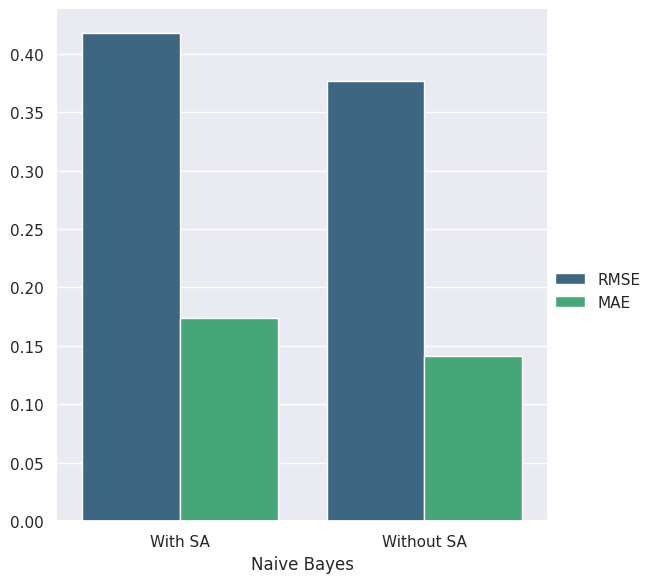

In [ ]:
# Draw a nested barplot by species and sex
g = sns.catplot(
    data=data_err_NB, kind="bar",
    x="SA", y="Values", hue="type",
    errorbar="sd", palette="viridis", height=6
)
g.despine(left=True)
g.set_axis_labels("Naive Bayes", "")
g.legend.set_title("")